In [1]:
#This generates the weibull parameters used for all future analysis

In [2]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time 
from scipy import stats

In [3]:
np.random.seed(0)
file_path = "../../csvs/Res_3_feats/"
planet_systems = np.loadtxt(file_path+"order.txt", dtype = str)
print planet_systems.shape

(101,)


In [4]:
"""
#input for pseudo data
N = 10000
gamma_in = 1 # 12
alpha_in = 10 # 6
a_in = 1
loc_in = 3 

#Generate data from given input
data = stats.exponweib.rvs(a=a_in,c=gamma_in, loc=loc_in, scale=alpha_in, size = N)

#The a and loc are fixed in the fit since it is standard to assume they are known
a_out, gamma_out, loc_out, alpha_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)

#Plot
bins = range(51)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.exponweib.pdf(bins, a=a_out,c=gamma_out,loc=loc_out,scale = alpha_out))
ax.hist(data, bins = bins , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()
"""

'\n#input for pseudo data\nN = 10000\ngamma_in = 1 # 12\nalpha_in = 10 # 6\na_in = 1\nloc_in = 3 \n\n#Generate data from given input\ndata = stats.exponweib.rvs(a=a_in,c=gamma_in, loc=loc_in, scale=alpha_in, size = N)\n\n#The a and loc are fixed in the fit since it is standard to assume they are known\na_out, gamma_out, loc_out, alpha_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)\n\n#Plot\nbins = range(51)\nfig = plt.figure() \nax = fig.add_subplot(1, 1, 1)\nax.plot(bins, stats.exponweib.pdf(bins, a=a_out,c=gamma_out,loc=loc_out,scale = alpha_out))\nax.hist(data, bins = bins , normed=True, alpha=0.5)\nax.annotate("Shape: $k = %.2f$ \n Scale: $\\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)\nplt.show()\n'

In [5]:
#try the fit on data without MCMC first
#id, gamma, loc, alpha
values = np.zeros((planet_systems.shape[0], 4))

for jj, planet_sys in enumerate(planet_systems[:]):
    
    data =pd.read_csv(file_path+"/Res_sys_"  , index_col = 0)
    data = data[data["t"]<1e8]
    #print data.shape
    data = np.log10(data["t"].values)
    #sys_name = planet_sys.split("_")[0]
    #print sys_name, planet_sys
    bins = np.linspace(1,10,100)

    #The a and loc are fixed in the fit since it is standard to assume they are known
    #assume loc is the mean of the data?
    #let a be one for now ,
    #start = time.time()
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    #print   stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    
    #print gamma_out.cov_params()
    
    #end = time.time()
    print('System', id_val, gamma_out, loc_out, alpha_out)
    values[jj, :] =  id_val, gamma_out, loc_out, alpha_out
    '''
    fig = plt.figure(figsize=(8,4)) 
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(bins, stats.weibull_min.pdf(bins,c=gamma_out,loc=loc_out,scale = alpha_out))
    ax.hist(data, normed = 1)
    plt.show()
    '''
    #break


('System', 0, 2.666553165645729, 2.8577181414852033, 1.0479867134288978)
('System', 100, 0.45561699373642905, 4.8132100884108535, 1.2956707295601477)
('System', 10, 2.698916506393843, 5.197121516365511, 1.2235453835004653)
('System', 11, 3.5672626855886507, 6.574244293538483, 0.9891638100466918)
('System', 12, 1.000000000027594, 7.999997907218672, 2.797762022073776e-15)
('System', 13, 1.6761212842429998, 4.216145105081676, 0.4723982647077283)
('System', 14, 3.7301955773185274, 3.6868490852856173, 1.054262956413849)
('System', 1, 1.000000000007761, 7.999999955146995, 2.7977620220140356e-15)
('System', 15, 2.0726691508107367, 4.460077958671601, 1.0540855355194814)
('System', 16, 2.6020534442929444, 6.180944906193103, 1.2476462271951516)
('System', 17, 1.0000000000038805, 7.999999976034192, 1.8651746813564765e-15)
('System', 18, 95050539.36483103, -15886185.62799753, 15886193.518618895)
('System', 19, 2.9717683792080036, 3.8315907518017642, 1.86803124642024)
('System', 20, 2.7909350431881

In [6]:
#values
values_frame = pd.DataFrame(values, columns=["ID", "Gamma", "Location", "Alpha"])
values_frame = values_frame.sort_values("ID")
values_frame.to_csv("../../csvs/Res_3_feats/Weibull_Parameters_{0}.csv".format(values_frame.shape[0]), index=None)
values_frame.head()

,ID,Gamma,Location,Alpha
0,0.0,2.666553,2.857718,1.047987e+00
7,1.0,1.000000,8.000000,2.797762e-15
18,2.0,0.999930,8.000000,1.064659e-14
29,3.0,2.861311,6.006627,9.342724e-01
40,4.0,1.465059,5.357733,3.657005e-01


In [7]:
#plot weibull histograms 
def plot_hists( planet_systems,title=None):
    #try making more coherent plots
    #planet systems is a numpy array, not pandaframe
    ncol, nrow = 3,len(planet_systems)//3 +1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    #axarr[0].histogram
    print(planet_systems.shape)
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv(file_path+planet_sys, index_col = 0)
        #print planet_sys, data.shape

        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[2]
        # make guassian
        gamma, mean, alpha =  values[jj, 1:] # first val is the id
        print gamma, mean, alpha
        x = np.linspace(data["logt"].min(), data["logt"].max(), 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=mean,scale = alpha)
        axarr[jj//ncol, jj%ncol ].plot(x, vals, linewidth = 4, color = "black")
        #color = graph[-1].get_color()
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name, alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        #create gaussian on top 
        axarr[jj//ncol, jj%ncol ].set_title(name)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        #print edges
        #if edges[1] > 2:
        #    print edges
        #    axarr[jj//ncol, jj%ncol ].set_ylim([0,min(3.5, edges[1])])
        #if name == "4641":
        #    axarr[jj//ncol, jj%ncol ].set_ylim([0,8])
    plt.show()
    if title == None:
        plt.close(fig)
    else:
        fig.savefig("../../Figures/MCMCFigures/"+title, bbox_extent = "tight")
    #plt.close(fig)

(101,)
2.666553165645729 2.8577181414852033 1.0479867134288978
0.45561699373642905 4.8132100884108535 1.2956707295601477
2.698916506393843 5.197121516365511 1.2235453835004653
3.5672626855886507 6.574244293538483 0.9891638100466918
1.000000000027594 7.999997907218672 2.797762022073776e-15
1.6761212842429998 4.216145105081676 0.4723982647077283
3.7301955773185274 3.6868490852856173 1.054262956413849
1.000000000007761 7.999999955146995 2.7977620220140356e-15
2.0726691508107367 4.460077958671601 1.0540855355194814
2.6020534442929444 6.180944906193103 1.2476462271951516
1.0000000000038805 7.999999976034192 1.8651746813564765e-15
95050539.36483103 -15886185.62799753 15886193.518618895
2.9717683792080036 3.8315907518017642 1.86803124642024
2.7909350431881252 3.333808355876873 1.0804555751638256
1.0000000000142282 7.999999157319068 1.8651746813610717e-15
2.395661916170818 4.738957627672615 1.078170987121785
1.3008249200502475 5.448790509080927 0.3212312174761033
90342667.19266367 -13003608.48

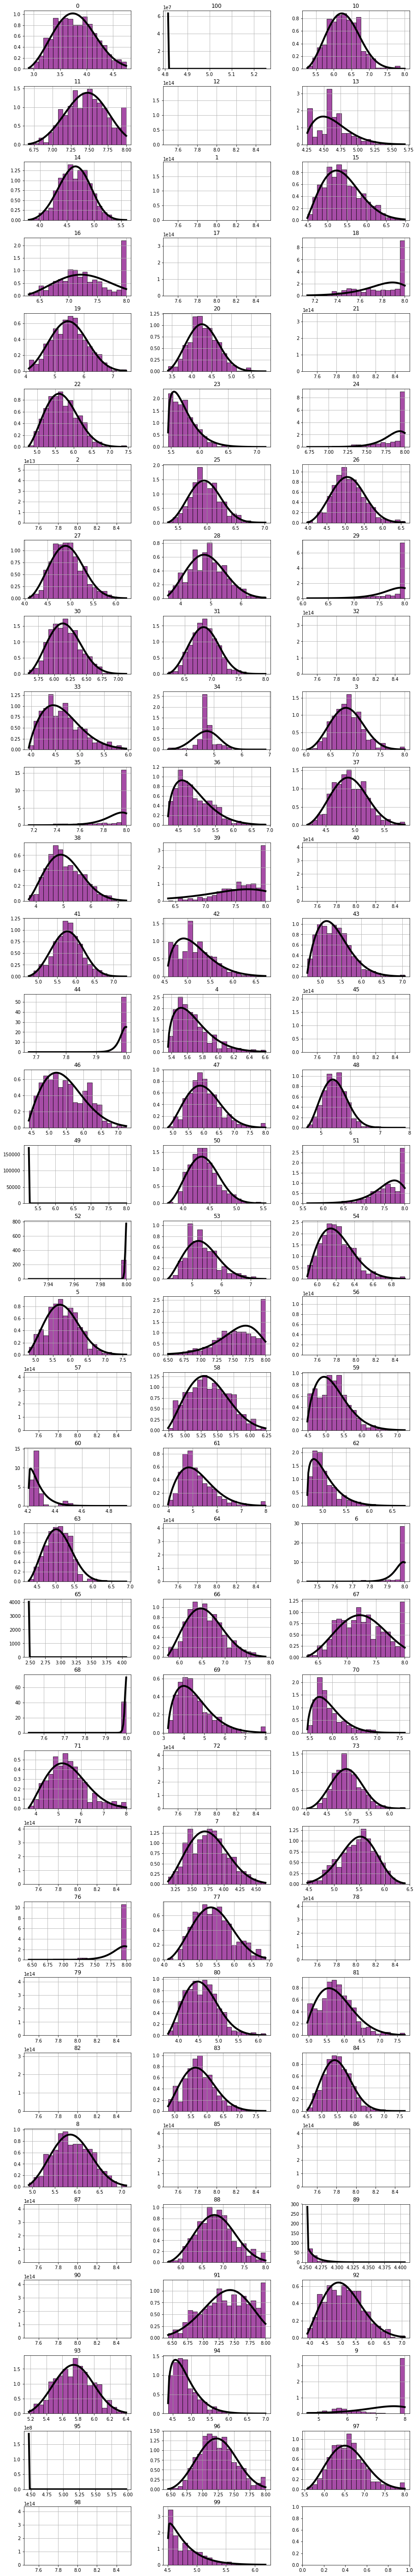

In [8]:
#print(type(planet_systems))
plot_hists(planet_systems) # file list names to load files